# the-croatian-cruyff

Luka Modrić profiles more like a La Masia graduate than a galactico. He is a versatile player just as likely to make a vital defensive action as he is to offer a cutback into the box. A [Bleacher Report article](https://bleacherreport.com/articles/2649702-a-complete-tactical-profile-of-real-madrid-midfielder-luka-modric) describes Modrić's proclivity for magical passes as such:

> He is Real's instigator of attacks, dictator of tempo and possesses the odd long-range missile in his boots, too, especially from the right channel.

The maps below have been created purely to appreciate this special footballer in what might be the highlight of his career, leading Croatia to a World Cup final. Modrić was named player of the tournament and his performance at the World Cup undoubtedly influenced his Ballon D'or win. He ended the tournament having completed more progressive passes than any other player, [as per FBref](https://fbref.com/en/comps/1/passing/FIFA-World-Cup-Stats).

For each game of the 2018 World Cup tournament, two maps showcasing Modrić's contributions are included:

* <b>Pass Maps: </b>show all passes that Modrić made as part of a successful sequence (a sequence that ends in a shot). Passes that contributed to a sequence that ended in a goal are highlighted in gold. You'll notice sweeping passes that switch play from one side of the pitch to another, as well as several passes that enter the penalty box.
* <b>Defensive Contribution Maps: </b>show where on the pitch Modrić made defensive actions. Through these maps, you can really appreciate just how much ground Modrić covers. He helps his team out quite literally all over the pitch.

I am very grateful for the [guide provided by Towards Data Science](https://towardsdatascience.com/advanced-sports-visualization-with-pandas-matplotlib-and-seaborn-9c16df80a81b), which provided me with the code to draw a football pitch, and with the know-how for plotting data onto the pitch. The data used has been made available for free via [Statsbomb's API](https://github.com/statsbomb/open-data).

In [10]:
from statsbombpy import sb
%matplotlib inline
import json
from pandas.io.json import json_normalize
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from functools import reduce

In [11]:
def draw_pitch(ax):
    # focus on only half of the pitch
    #Pitch Outline & Centre Line
    Pitch = Rectangle([0,0], width = 120, height = 80, fill = False)
    #Left, Right Penalty Area and midline
    LeftPenalty = Rectangle([0,22.3], width = 14.6, height = 35.3, fill = False)
    RightPenalty = Rectangle([105.4,22.3], width = 14.6, height = 35.3, fill = False)
    midline = ConnectionPatch([60,0], [60,80], "data", "data")

    #Left, Right 6-yard Box
    LeftSixYard = Rectangle([0,32], width = 4.9, height = 16, fill = False)
    RightSixYard = Rectangle([115.1,32], width = 4.9, height = 16, fill = False)


    #Prepare Circles
    centreCircle = plt.Circle((60,40),8.1,color="black", fill = False)
    centreSpot = plt.Circle((60,40),0.71,color="black")
    #Penalty spots and Arcs around penalty boxes
    leftPenSpot = plt.Circle((9.7,40),0.71,color="black")
    rightPenSpot = plt.Circle((110.3,40),0.71,color="black")
    leftArc = Arc((9.7,40),height=16.2,width=16.2,angle=0,theta1=310,theta2=50,color="black")
    rightArc = Arc((110.3,40),height=16.2,width=16.2,angle=0,theta1=130,theta2=230,color="black")
    
    element = [Pitch, LeftPenalty, RightPenalty, midline, LeftSixYard, RightSixYard, centreCircle, 
               centreSpot, rightPenSpot, leftPenSpot, leftArc, rightArc]
    for i in element:
        ax.add_patch(i)

In [183]:
def pass_map(match_id):
    matchdf = sb.events(match_id=match_id) 
    shot_ending = matchdf[(matchdf.type == "Shot") & (matchdf.possession_team == "Croatia")]
    goal_ending = matchdf[(matchdf.type == "Shot") & (matchdf.possession_team == "Croatia") & (matchdf.shot_outcome == "Goal")]
    shot_ending_list = shot_ending["possession"].tolist()
    goal_ending_list = goal_ending["possession"].tolist()
    modric_df = matchdf[(matchdf.player =='Luka Modrić') & (matchdf.type == "Pass")]

    modric_se_df = modric_df[modric_df['possession'].isin(shot_ending_list)]

    fig, ax = plt.subplots()
    fig.set_size_inches(7, 5)
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    draw_pitch(ax)
    plt.axis('off')
    for i in range(len(modric_se_df)):
        color = "gold" if modric_se_df.iloc[i]["possession"] in goal_ending_list else "silver"

        
        ax.annotate("", xy = (modric_se_df.iloc[i]['pass_end_location'][0], modric_se_df.iloc[i]['pass_end_location'][1]), xycoords = 'data',
               xytext = (modric_se_df.iloc[i]['location'][0], modric_se_df.iloc[i]['location'][1]), textcoords = 'data',
               arrowprops=dict(arrowstyle="->",connectionstyle="arc3",color = color),)
    plt.show()

In [187]:
def def_map(match_id):
    matchdf = sb.events(match_id=match_id) 
    fig=plt.figure()
    fig.set_size_inches(7, 5)
    ax=fig.add_subplot(1,1,1)
    draw_pitch(ax)
    plt.axis('off')
    #interceptions
    modric_int_df = matchdf[(matchdf.player =='Luka Modrić') & (matchdf.type == "Interception")]
    x_int = [location[0] for i, location in enumerate(modric_int_df["location"])]
    y_int = [location[1] for i, location in enumerate(modric_int_df["location"])]
    ax.scatter(x_int, y_int, c = 'blue', label = 'Interceptions')
    #pressures
    modric_press_df = matchdf[(matchdf.player =='Luka Modrić') & (matchdf.type == "Pressure")]
    x_press = [location[0] for i, location in enumerate(modric_press_df["location"])]
    y_press = [location[1] for i, location in enumerate(modric_press_df["location"])]
    ax.scatter(x_press, y_press, c = 'green', label = 'Pressure')
    #blocks
    modric_block_df = matchdf[(matchdf.player =='Luka Modrić') & (matchdf.type == "Block")]
    x_block = [location[0] for i, location in enumerate(modric_block_df["location"])]
    y_block = [location[1] for i, location in enumerate(modric_block_df["location"])]
    ax.scatter(x_block, y_block, c = 'red', label = 'Block')
    #duels
    modric_duel_df = matchdf[(matchdf.player =='Luka Modrić') & (matchdf.type == "Duel")]
    x_duel = [location[0] for i, location in enumerate(modric_duel_df["location"])]
    y_duel = [location[1] for i, location in enumerate(modric_duel_df["location"])]
    ax.scatter(x_duel, y_duel, c = 'yellow', label = 'Duel')
    plt.ylim(-2, 82)
    plt.xlim(-2, 122)
    plt.legend(loc='lower right')
    plt.axis('off')
    plt.show()

In [186]:
wc_matches = sb.matches(competition_id=43, season_id=3)
columns = ['match_id', 'home_team', 'away_team', 'home_score', 'away_score', 'competition_stage']
wc_matches_croatia = wc_matches[(wc_matches.home_team == "Croatia") | (wc_matches.away_team == "Croatia")]
wc_matches_croatia = wc_matches_croatia.sort_values(by="match_date")
wc_matches_croatia = wc_matches_croatia[columns]
print(wc_matches_croatia)

credentials were not supplied. open data access only
    match_id  home_team away_team  home_score  away_score competition_stage
17      7529    Croatia   Nigeria           2           0       Group Stage
30      7545  Argentina   Croatia           0           3       Group Stage
33      7561    Iceland   Croatia           1           2       Group Stage
15      7581    Croatia   Denmark           1           1       Round of 16
60      8652     Russia   Croatia           2           2    Quarter-finals
53      8656    Croatia   England           2           1       Semi-finals
32      8658     France   Croatia           4           2             Final


## Group Stage 1: Croatia 2, Nigeria 0

credentials were not supplied. open data access only


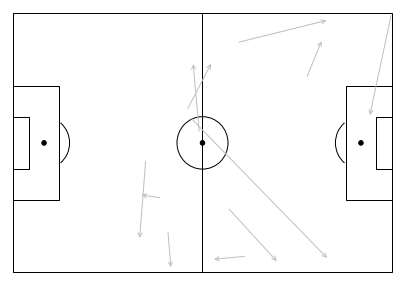

credentials were not supplied. open data access only


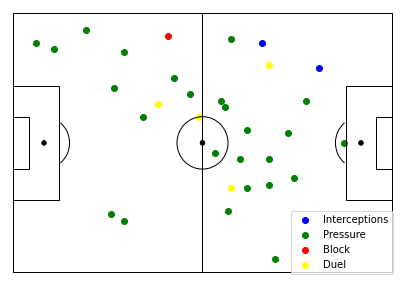

In [188]:
pass_map(7529)
def_map(7529)

## Group Stage 2: Argentina 0, Croatia 3

credentials were not supplied. open data access only


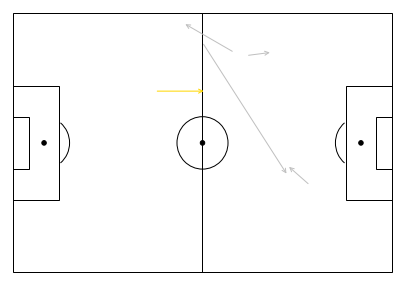

credentials were not supplied. open data access only


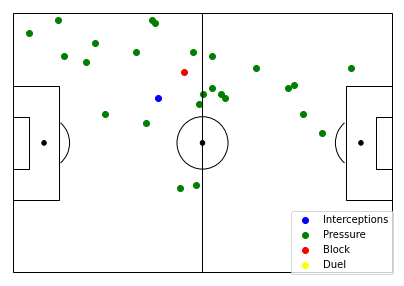

In [189]:
pass_map(7545)
def_map(7545)

## Group Stage 3: Iceland 1, Croatia

credentials were not supplied. open data access only


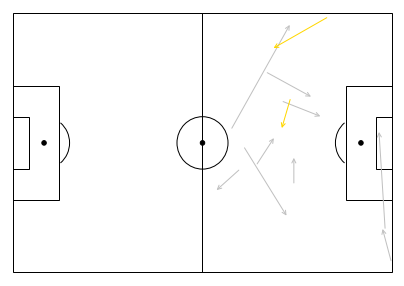

credentials were not supplied. open data access only


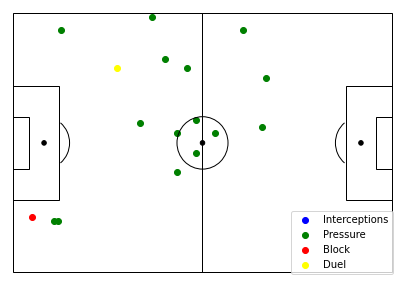

In [190]:
pass_map(7561)
def_map(7561)

## Round of 16: Croatia 1, Denmark 1

credentials were not supplied. open data access only


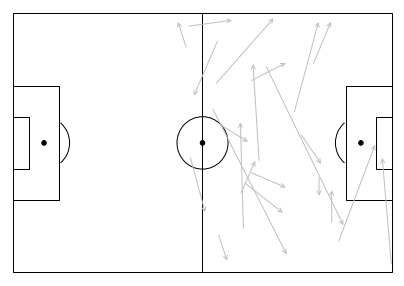

credentials were not supplied. open data access only


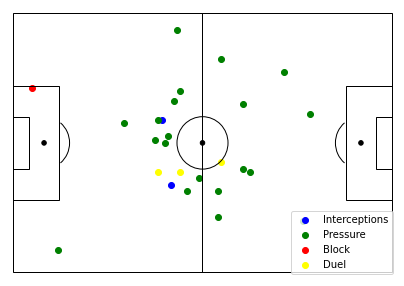

In [191]:
pass_map(7581)
def_map(7581)

## Quarter-Finals: Russia 2, Croatia 2

credentials were not supplied. open data access only


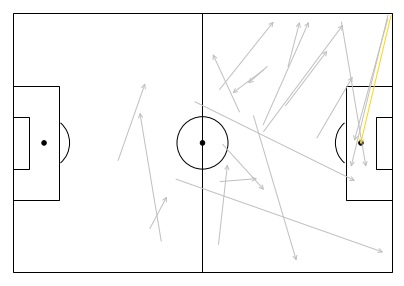

credentials were not supplied. open data access only


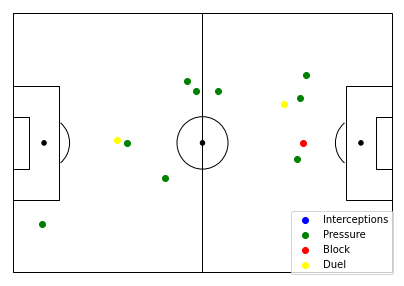

In [192]:
pass_map(8652)
def_map(8652)

## Semi-Finals: Croatia 2, England 1

credentials were not supplied. open data access only


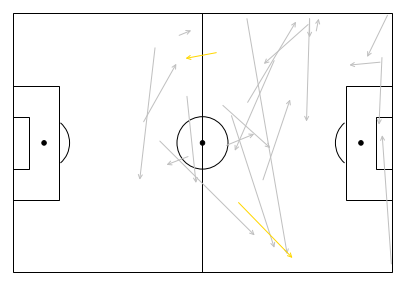

credentials were not supplied. open data access only


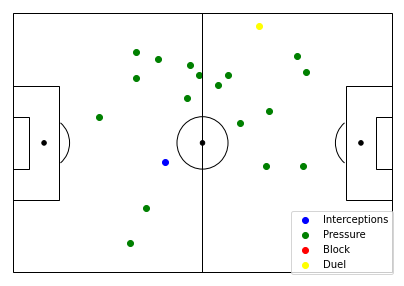

In [193]:
pass_map(8656)
def_map(8656)

## Final: France 4, Croatia 2

credentials were not supplied. open data access only


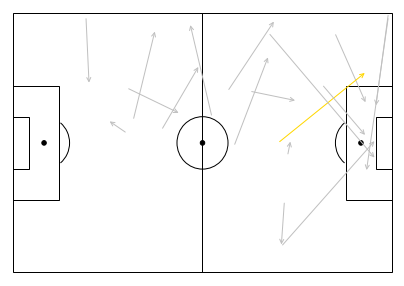

credentials were not supplied. open data access only


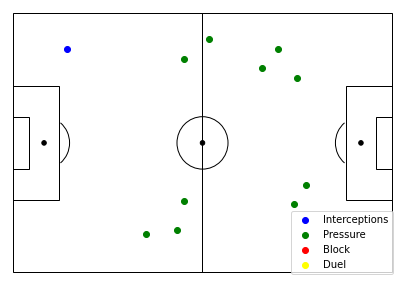

In [194]:
pass_map(8658)
def_map(8658)